In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data=pd.read_csv("sleep.csv")


In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    float64
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 38.1+ KB


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,373.000000,374.000000
mean,187.500000,42.184492,7.129491,7.312834,59.171123,5.385027,70.126005,6816.844920
std,108.108742,8.673133,0.794073,1.196956,20.830804,1.774526,4.068988,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,1
Sleep Duration,1
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,1


In [ ]:
data['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,62
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [ ]:
data['Occupation'].replace(np.nan,"Nurse",inplace=True)


/tmp/ipython-input-982998653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Occupation'].replace(np.nan,"Nurse",inplace=True)


In [ ]:
data['Sleep Disorder']=data['Sleep Disorder'].replace(np.nan,'no effect')

In [ ]:
data['Sleep Duration']=data['Sleep Duration'].replace(np.nan,data['Sleep Duration'].mean())

In [ ]:
data['Sleep Duration']=data['Sleep Duration'].replace(np.nan,data['Sleep Duration'].mean())

In [ ]:
data['BMI Category']=data['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
Gender_Dailysteps = data.groupby('Gender')['Sleep Duration'].mean()
Gender_Dailysteps

,Sleep Duration
Gender,
Female,7.224484
Male,7.036508


In [ ]:
groubd_data = data.groupby(['Occupation','BMI Category']).agg({
'Sleep Duration':'mean', 'Quality of Sleep':'mean'})
groubd_data

Sleep Duration  Quality of Sleep
Occupation           BMI Category                                  
Accountant           Normal              7.219355          8.064516
                     Overweight          6.566667          7.000000
Doctor               Normal              6.926866          6.567164
                     Obese               7.700000          8.000000
Engineer             Normal              8.030508          8.491525
                     Overweight          6.966667          6.666667
Lawyer               Normal              7.425581          7.976744
                     Obese               7.400000          7.000000
                     Overweight          7.100000          7.000000
Manager              Overweight          6.900000          7.000000
Nurse                Normal              7.100000          6.500000
                     Overweight          7.065598          7.500000
Sales Representative Obese               5.900000          4.000000
Salesperson          Overweight          6.403125          6.000000
Scientist            Overweight          6.000000          5.000000
Software Engineer    Normal              7.500000          8.000000
                     Obese               5.900000          4.000000
                     Overweight          6.100000          6.000000
Teacher              Normal              7.166667          8.000000
                     Obese               6.300000          6.000000
                     Overweight          6.615152          6.818182

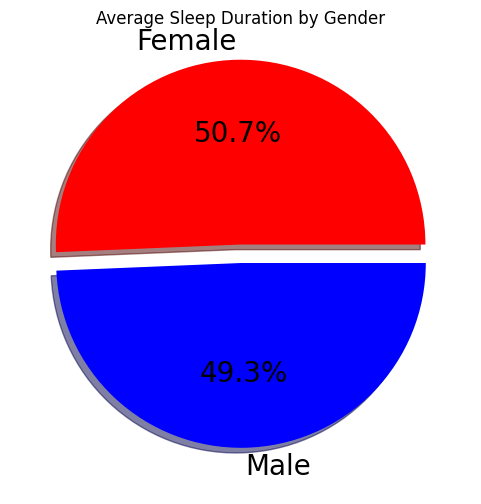

In [ ]:
explode_=[0.1,0]
colors_=['red','blue']
plt.figure(figsize=(6,6))
Gender_Dailysteps.plot(kind='pie' ,labels=Gender_Dailysteps.index, autopct='%1.1f%%',
explode = explode_, colors=colors_,shadow=True, textprops={'color':'black', 'fontsize':20})

plt.title("Average Sleep Duration by Gender")
plt.ylabel("")
plt.show()


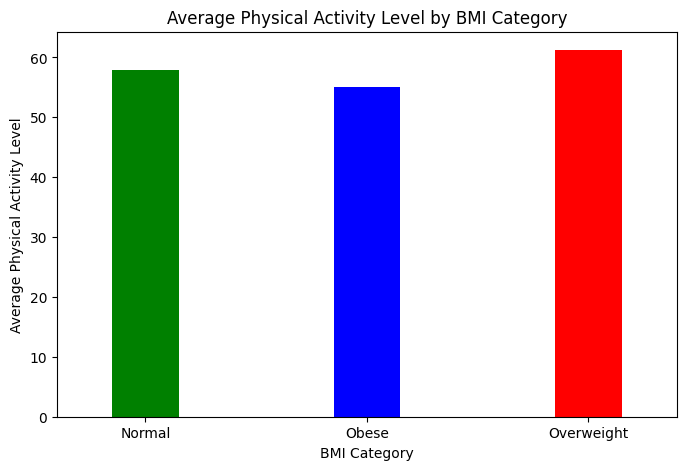

In [ ]:
avg_activity = data.groupby('BMI Category')['Physical Activity Level'].mean()

plt.figure(figsize=(8,5))
avg_activity.plot(kind='bar', color=['green','blue','red'],width=0.3)
plt.title("Average Physical Activity Level by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Average Physical Activity Level")
plt.xticks(rotation=0)
plt.show()


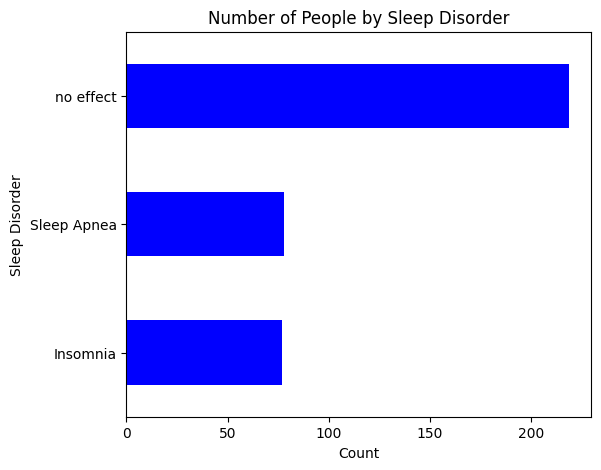

In [ ]:
sleep_disorder_count = data.groupby('Sleep Disorder')['Person ID'].count()

plt.figure(figsize=(6,5))
sleep_disorder_count.plot(kind='barh', color='blue')
plt.title("Number of People by Sleep Disorder")
plt.xlabel("Count")
plt.ylabel("Sleep Disorder")
plt.show()


<Figure size 800x600 with 0 Axes>

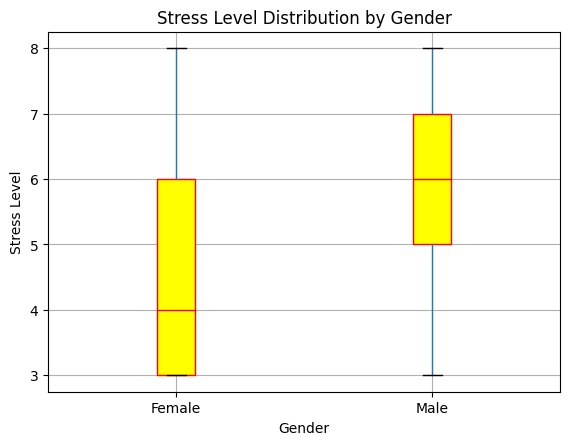

In [ ]:
plt.figure(figsize=(8,6))
data.boxplot(column='Stress Level', by='Gender', patch_artist=True,
boxprops=dict(facecolor='YELLOW', color='RED'), medianprops=dict(color='red'),
flierprops=dict(marker='o', markerfacecolor='green', markersize=8))
plt.title("Stress Level Distribution by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Stress Level")
plt.show()


In [ ]:
data['Stress Level'].min()

NameError: name 'data' is not defined